In [ ]:
from google.colab import files

uploaded = files.upload()


Saving train.csv to train.csv


# **Task 1: Import Libraries**

In [ ]:
!pip install catboost
!pip install dask

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import plotly.graph_objects as go

%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

import lightgbm as lgb
from catboost import CatBoostClassifier, Pool
from catboost.utils import eval_metric

from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

plt.style.use("ggplot")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.8 MB/s eta 0:00:00


# **Task 2: Exploratory Data Analysis**

In [ ]:
df=pd.read_csv('train.csv')
df = df.copy()

Understanding the dataset

In [ ]:
df.head()
df.info()
df.describe()
print("Number of rows:",{df.shape[0]})
print("Number of columns:",{df.shape[1]})
print("Number of Null values:",{df.isnull().sum().sum()})
print("Number of duplicated:",{df.duplicated().sum()})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB
Number of rows: {165034}
Number of columns: {14}
Number of Null values: {0

 Visualise the distribution of features

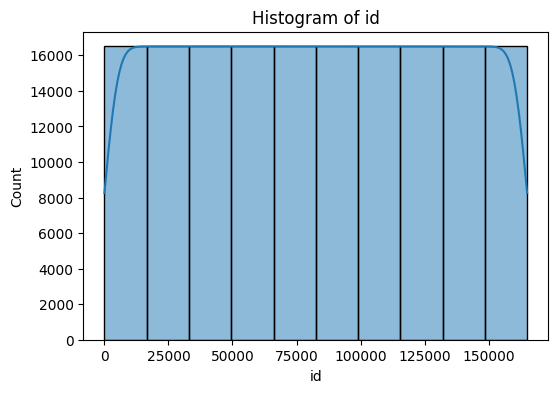

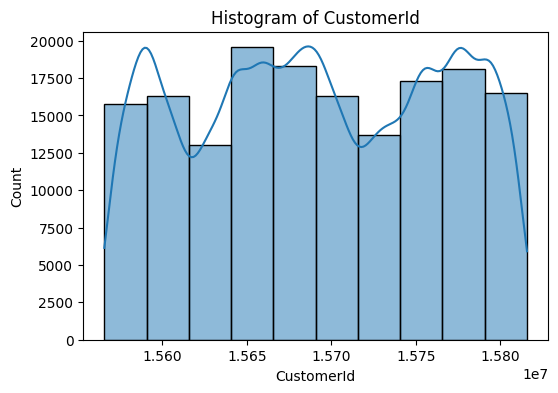

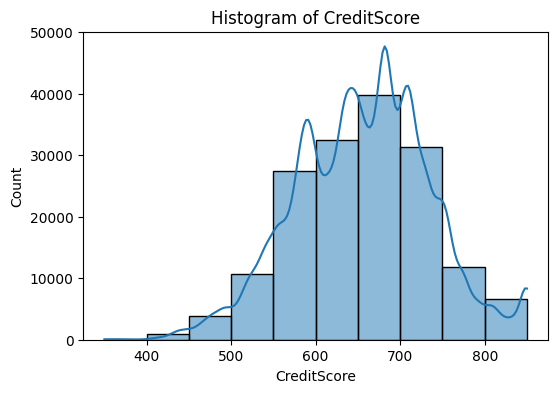

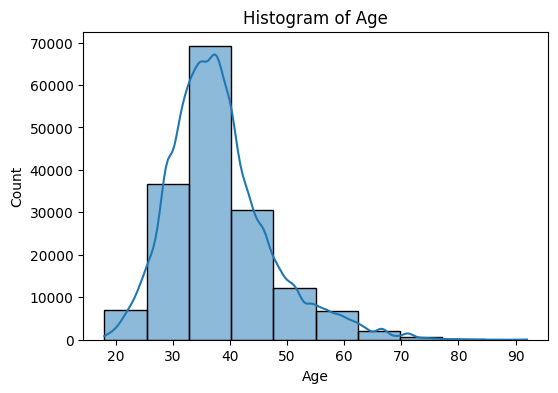

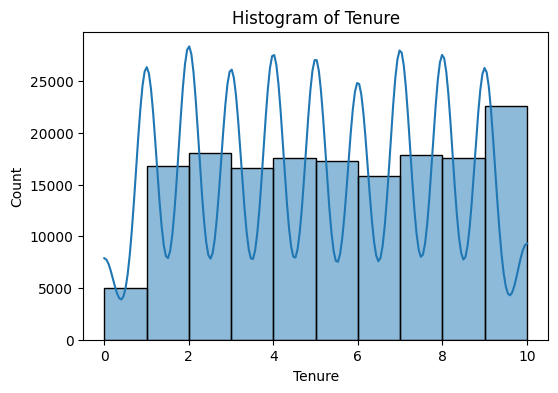

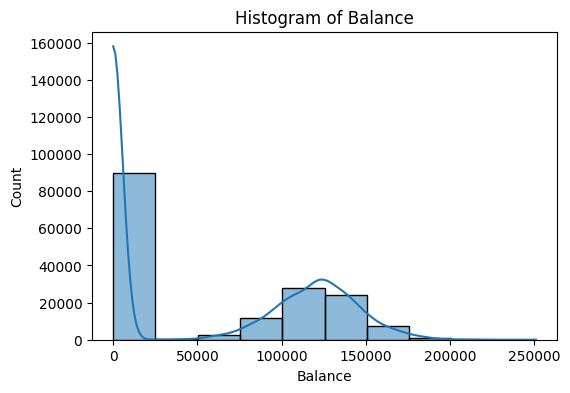

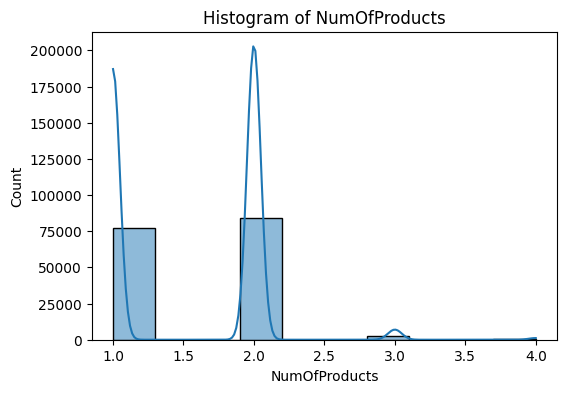

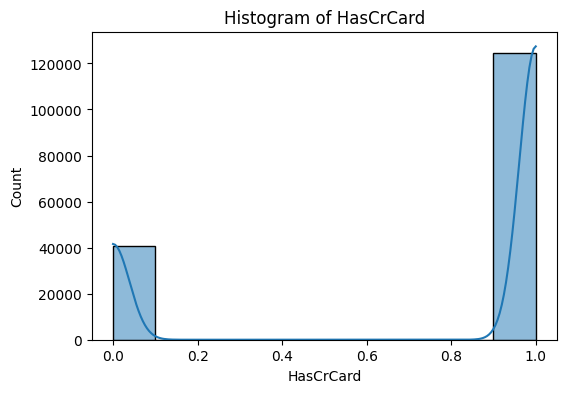

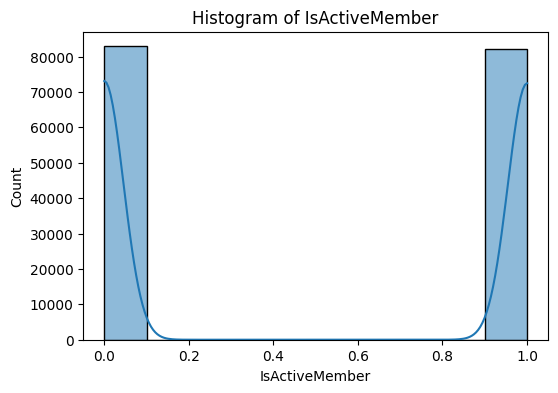

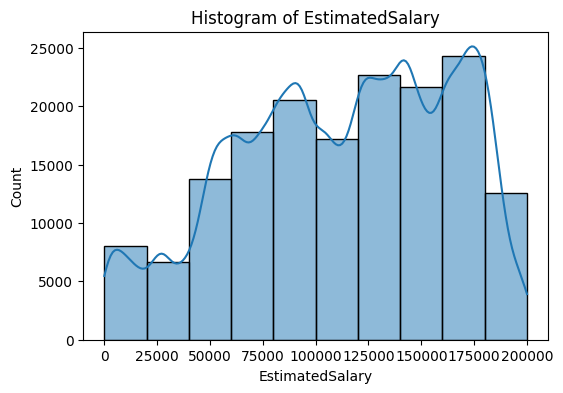

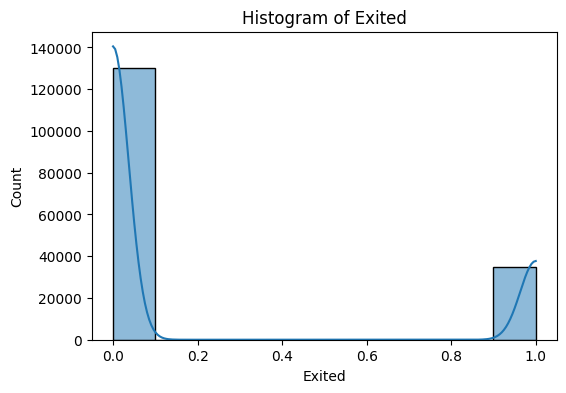

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], bins=10, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.show()

Count plots for categorical and numerical data in dataset

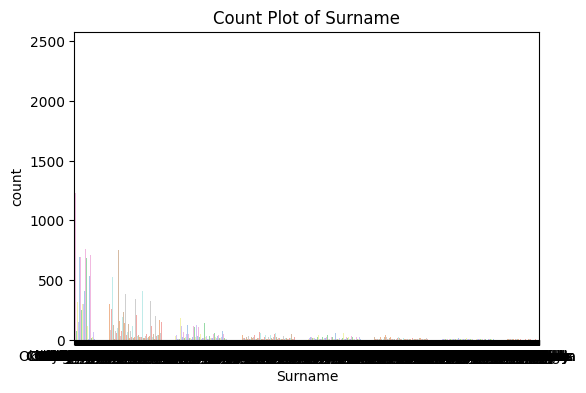

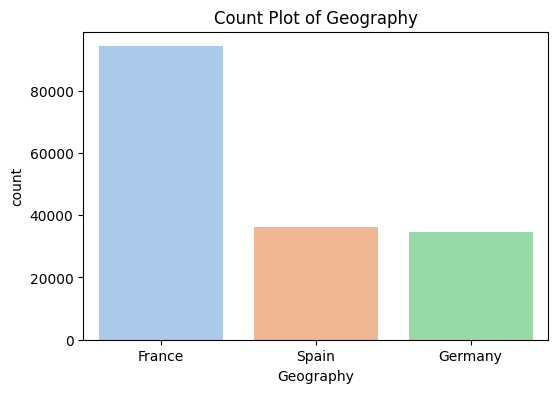

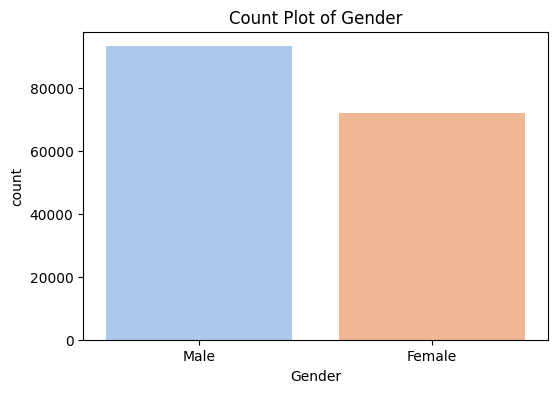

In [ ]:
#count plot
categorical_features = df.select_dtypes(include=['object', 'category']).columns


for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[feature], palette='pastel')
    plt.title(f'Count Plot of {feature}')
    plt.show()

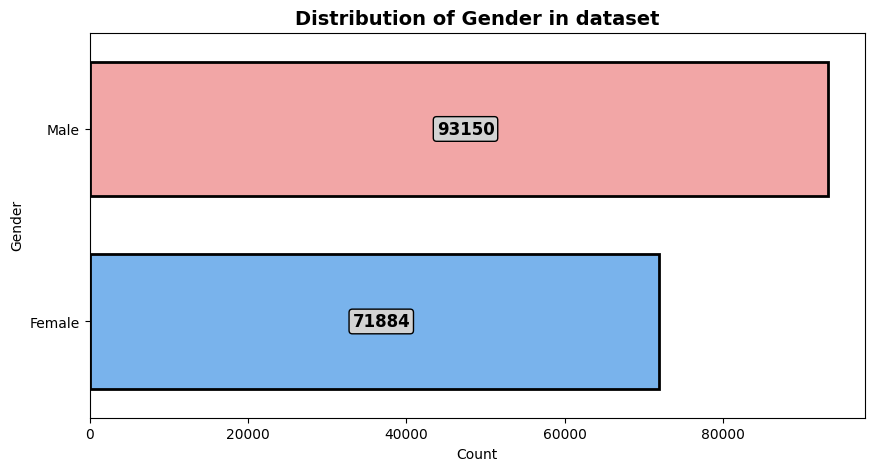

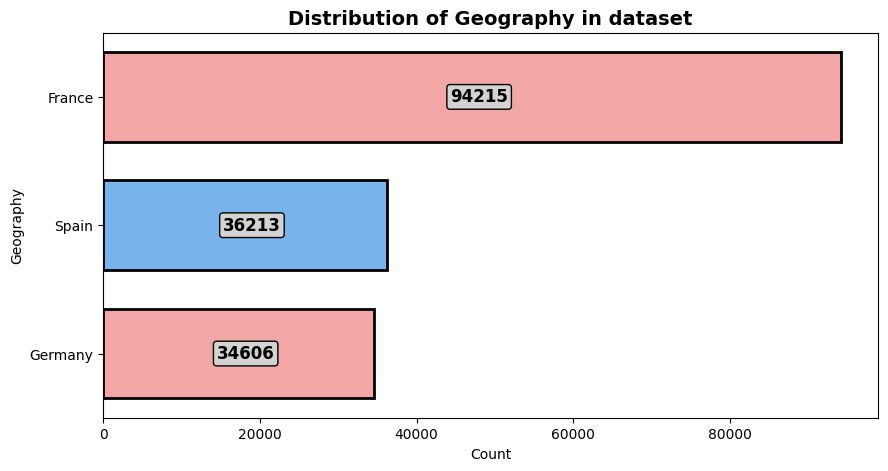

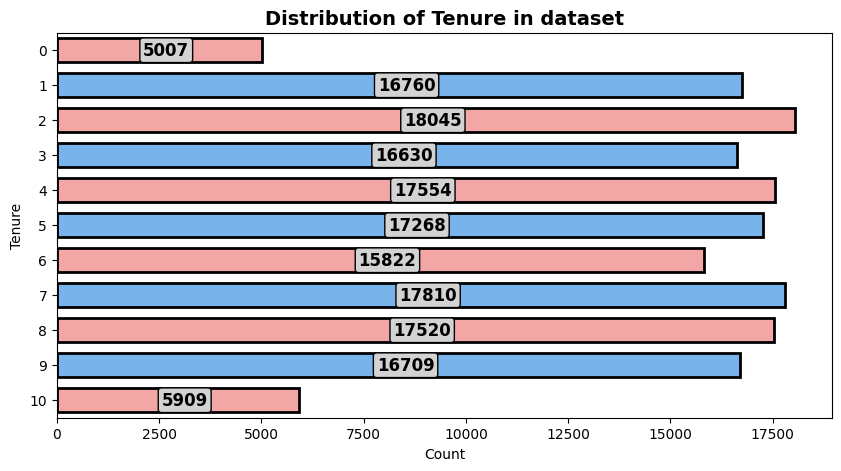

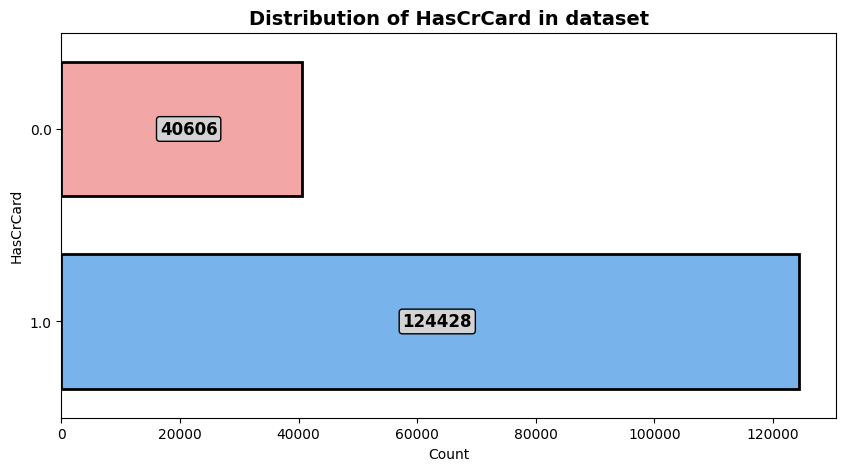

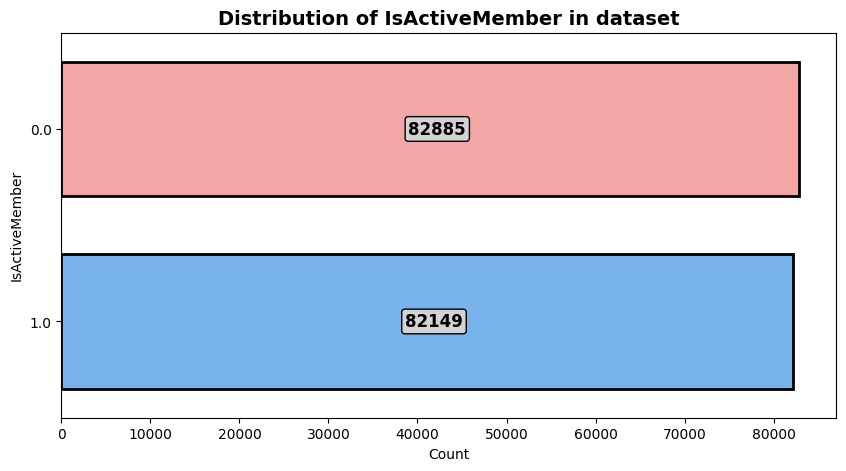

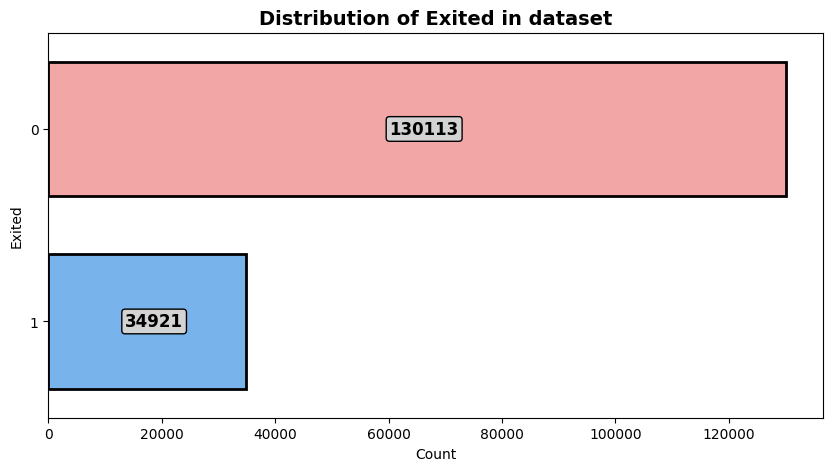

In [ ]:

plt.figure(figsize=(10, 5))


p = sns.countplot(y="Gender", data=df, palette=["#ff9999", "#66b3ff"], edgecolor="black", linewidth=2, width=0.7)

for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=12, fontweight="bold", padding=5,
                  bbox=dict(boxstyle="round", pad=0.2, facecolor="lightgray", edgecolor="black", linewidth=1))


plt.title("Distribution of Gender in dataset", fontsize=14, fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Gender")


plt.show()

plt.figure(figsize=(10, 5))

p = sns.countplot(y="Geography", data=df, palette=["#ff9999", "#66b3ff"], edgecolor="black", linewidth=2, width=0.7)

for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=12, fontweight="bold", padding=5,
                  bbox=dict(boxstyle="round", pad=0.2, facecolor="lightgray", edgecolor="black", linewidth=1))

plt.title("Distribution of Geography in dataset", fontsize=14, fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Geography")

plt.show()

plt.figure(figsize=(10, 5))


p = sns.countplot(y="Tenure", data=df, palette=["#ff9999", "#66b3ff"], edgecolor="black", linewidth=2, width=0.7)

for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=12, fontweight="bold", padding=5,
                  bbox=dict(boxstyle="round", pad=0.2, facecolor="lightgray", edgecolor="black", linewidth=1))

plt.title("Distribution of Tenure in dataset", fontsize=14, fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Tenure")


plt.show()

plt.figure(figsize=(10, 5))


p = sns.countplot(y="HasCrCard", data=df, palette=["#ff9999", "#66b3ff"], edgecolor="black", linewidth=2, width=0.7)

for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=12, fontweight="bold", padding=5,
                  bbox=dict(boxstyle="round", pad=0.2, facecolor="lightgray", edgecolor="black", linewidth=1))

plt.title("Distribution of HasCrCard in dataset", fontsize=14, fontweight="bold")
plt.xlabel("Count")
plt.ylabel("HasCrCard")

plt.show()

plt.figure(figsize=(10, 5))

p = sns.countplot(y="IsActiveMember", data=df, palette=["#ff9999", "#66b3ff"], edgecolor="black", linewidth=2, width=0.7)

for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=12, fontweight="bold", padding=5,
                  bbox=dict(boxstyle="round", pad=0.2, facecolor="lightgray", edgecolor="black", linewidth=1))

plt.title("Distribution of IsActiveMember in dataset", fontsize=14, fontweight="bold")
plt.xlabel("Count")
plt.ylabel("IsActiveMember")


plt.show()

plt.figure(figsize=(10, 5))


p = sns.countplot(y="Exited", data=df, palette=["#ff9999", "#66b3ff"], edgecolor="black", linewidth=2, width=0.7)

for container in p.containers:
    plt.bar_label(container, label_type="center", color="black", fontsize=12, fontweight="bold", padding=5,
                  bbox=dict(boxstyle="round", pad=0.2, facecolor="lightgray", edgecolor="black", linewidth=1))

plt.title("Distribution of Exited in dataset", fontsize=14, fontweight="bold")
plt.xlabel("Count")
plt.ylabel("Exited")

plt.show()

Violin Plot for numerical data and stacked bar graph for categorical data

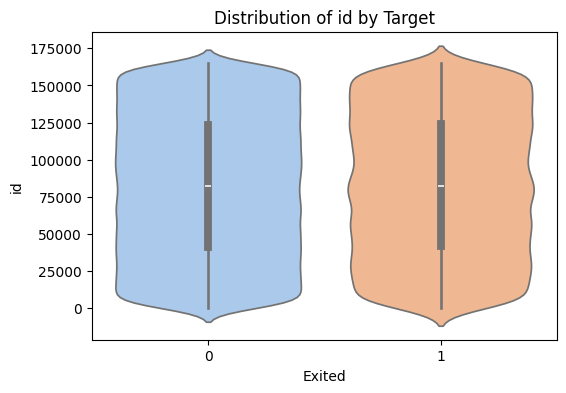

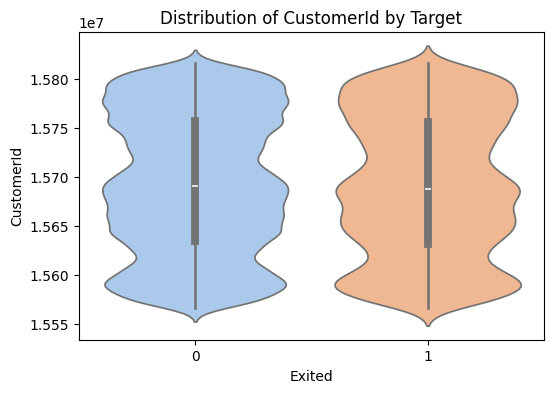

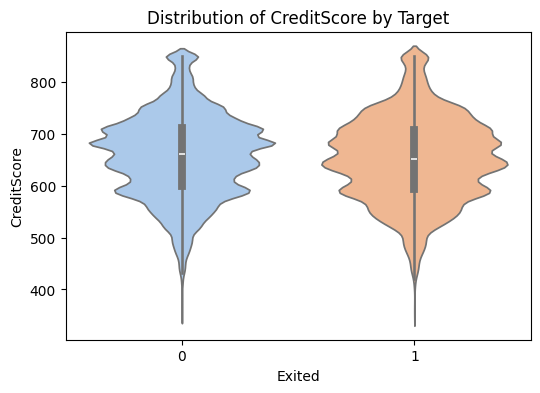

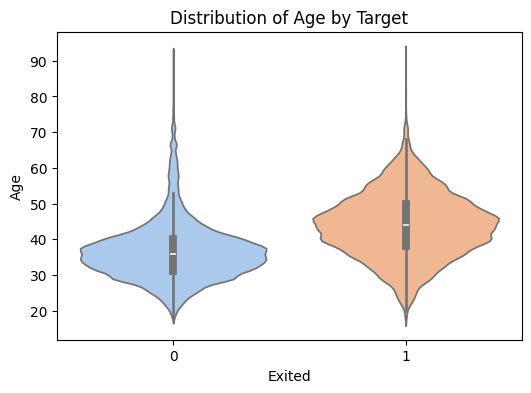

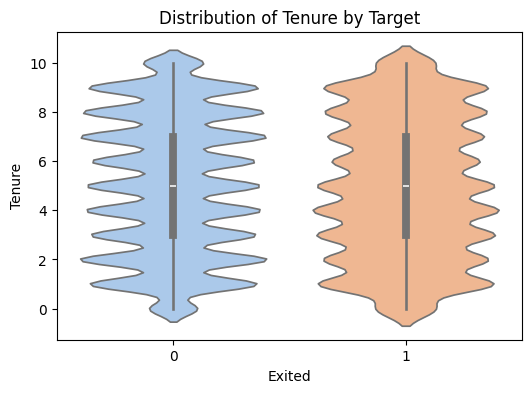

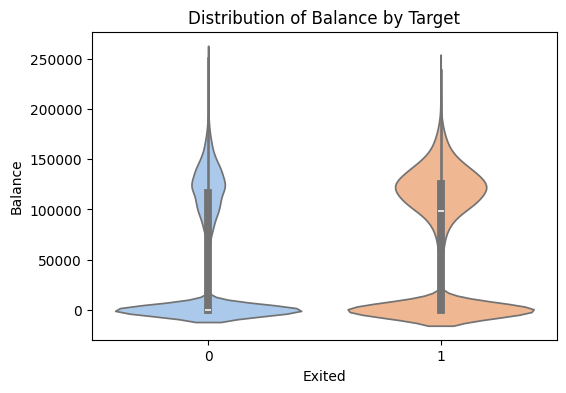

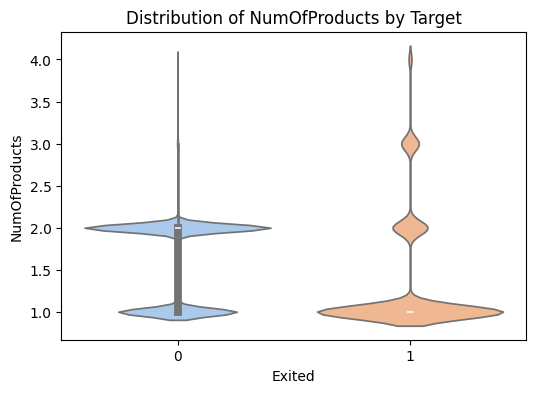

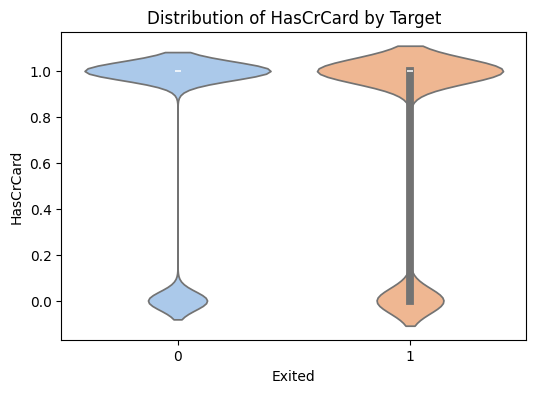

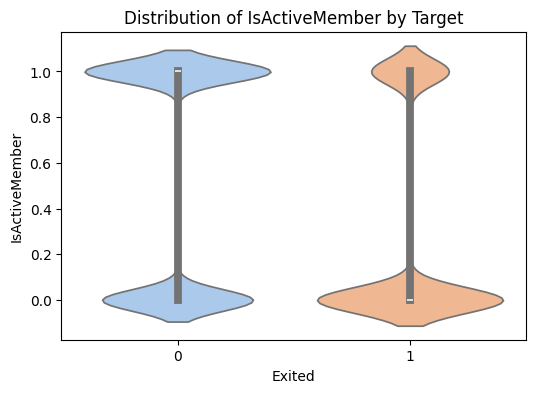

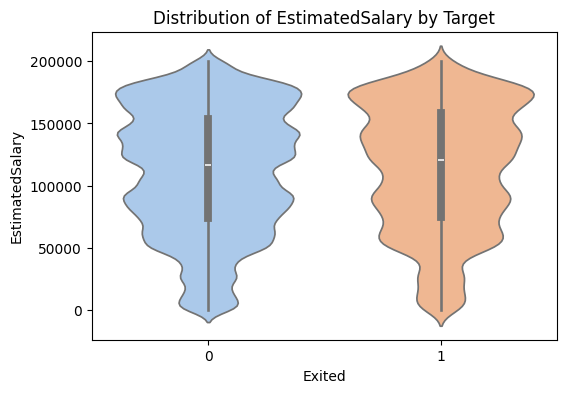

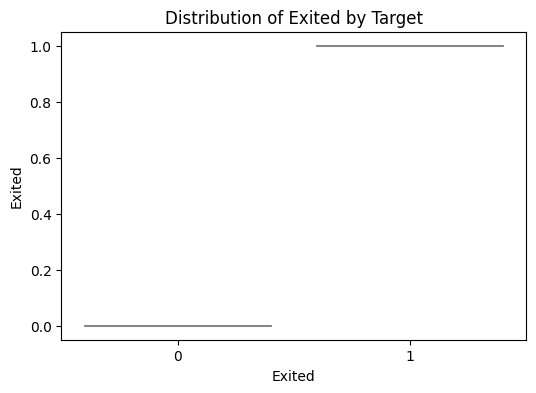

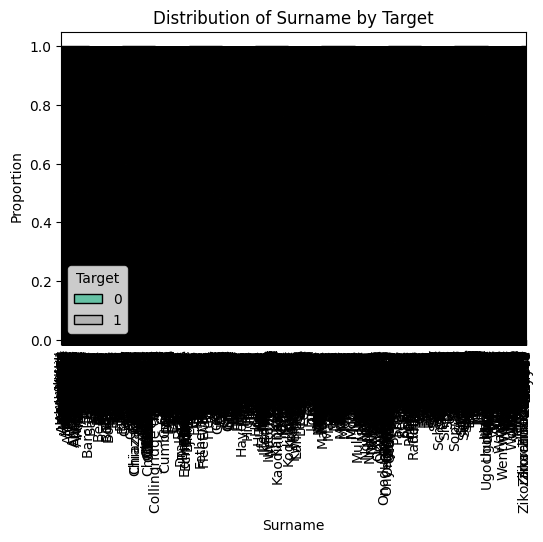

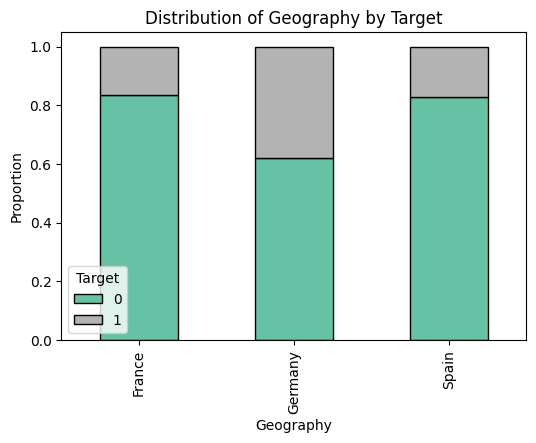

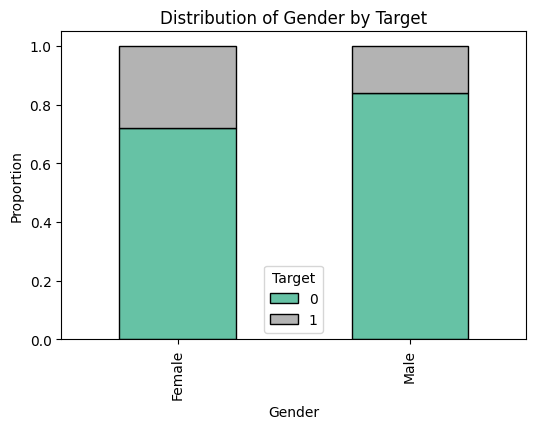

In [ ]:
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x="Exited", y=feature, data=df, palette="pastel")
    plt.title(f'Distribution of {feature} by Target')
    plt.show()


for feature in categorical_features:
    crosstab = pd.crosstab(df[feature], df['Exited'], normalize='index')

    crosstab.plot(kind='bar', stacked=True, figsize=(6, 4), colormap="Set2", edgecolor="black")
    plt.title(f'Distribution of {feature} by Target')
    plt.xlabel(feature)
    plt.ylabel("Proportion")
    plt.legend(title="Target")
    plt.show()

 Remove outliers and box-plot

Columns in df_filtered: Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


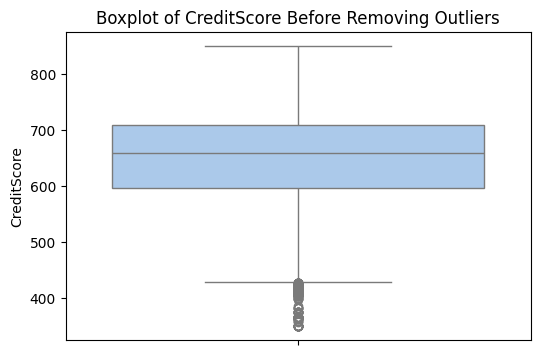

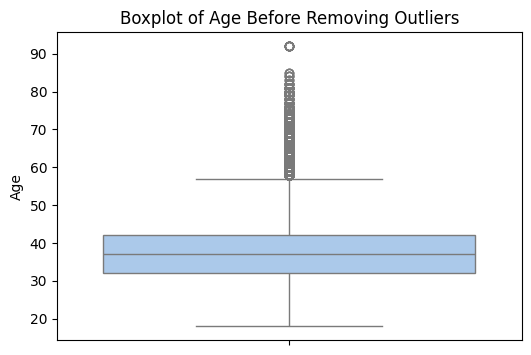

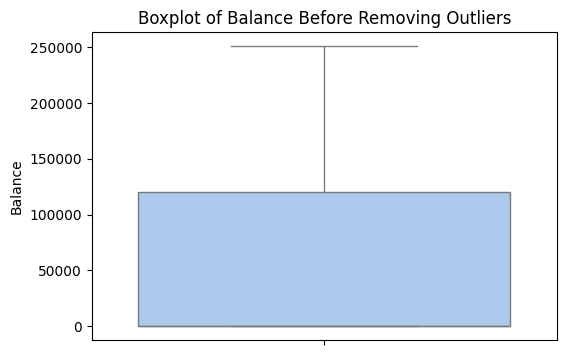

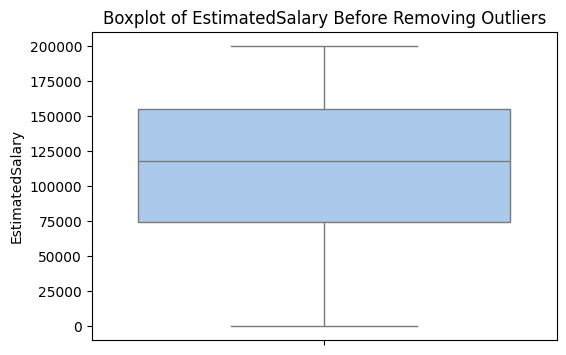

NameError: name 'remove_outliers_iqr' is not defined

In [ ]:
# Select columns where you want to remove outliers
selected_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']  # Adjust as needed

# Function to remove outliers using IQR
def rem_out_iqr(df, columns):
    df_clean = df.copy()  # Copy to avoid modifying the original data

    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Only filter out outliers in selected columns but keep all other columns
        df_clean = df_clean.loc[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]

    return df_clean

df_filtered = rem_out_iqr(df, selected_columns)


print("Columns in df_filtered:", df_filtered.columns)

for column in selected_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[column], palette="pastel")
    plt.title(f"Boxplot of {column} Before Removing Outliers")
    plt.show()


df_filtered = remove_outliers_iqr(df, selected_columns)


for column in selected_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_filtered[column], palette="pastel")
    plt.title(f"Boxplot of {column} After Removing Outliers")
    plt.show()


print("Original Dataset Size:", df.shape[0])
print("Cleaned Dataset Size:", df_filtered.shape[0])


# **Logisting Regression Implementation**

In [ ]:
class LogisticRegressionScratch:
    def sigmoid(self, z):  #maps value between 0 and 1
        return 1 / (1 + np.exp(-z))

    def __init__(self, lr=0.01, n_iter=1000, lambda_param=0.01, class_weight=None):
        self.lr = lr  #initializes parameters
        self.n_iter = n_iter
        self.lambda_param = lambda_param
        self.class_weight = class_weight
        self.weights = None
        self.bias = None

    def fit(self, X, y):  #for training the model
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64)
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features, dtype=np.float64)
        self.bias = 0.0


        if self.class_weight == 'balanced':  #for class imbalance
            class_counts = np.bincount(y.astype(int))
            class_weights = n_samples / (len(class_counts) * class_counts)
            sample_weights = class_weights[y.astype(int)]
        else:
            sample_weights = np.ones(n_samples)

        #gradient descent for weights and biases
        for _ in range(self.n_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, sample_weights * (y_pred - y)) + (self.lambda_param / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(sample_weights * (y_pred - y))

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def pred_prob(self, X):  #calc predicted probabilitesd
        X = np.array(X, dtype=np.float64)
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def pred(self, X, threshold=0.5): #for prediction result
        prob = self.pred_prob(X)
        return [1 if p >= threshold else 0 for p in prob]


In [ ]:

X = df_filtered.drop(columns=['Exited'])
y = df_filtered['Exited'].astype(int)

X = pd.get_dummies(X, drop_first=True)

#data spliting
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

#standardization
num_vars = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])
#training
lr_model = LogisticRegressionScratch(lr=0.01, n_iter=1000, lambda_param=0.01, class_weight='balanced')
lr_model.fit(X_train, y_train)

#result prediction
y_pred = lr_model.pred(X_test)

#Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

print("Custom Logistic Regression:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Custom Logistic Regression:
Accuracy: 0.74
Precision: 0.42
Recall: 0.75
F1 Score: 0.54


Checked the model performance without One-Hot Encoding (OHE) and observed a decline in performance.

In [ ]:


X = df_filtered.drop(columns=['Exited'])
y = df_filtered['Exited'].astype(int)


cat_vars = X.select_dtypes(include=['object']).columns


num_vars = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[num_vars] = scaler.fit_transform(X[num_vars])


X = X.drop(columns=cat_vars)


split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


print("Without Encoding Categorical Variables:")
lr_model = LogisticRegressionScratch(lr=0.01, n_iter=1000, lambda_param=0.01, class_weight='balanced')
lr_model.fit(X_train, y_train)
y_pred = lr_model.pred(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Without Encoding Categorical Variables:
Accuracy: 0.70
Precision: 0.39
Recall: 0.78
F1 Score: 0.52


In [ ]:
def compare_standardization(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Without Standardization
    lr_no_scaling = LogisticRegressionScratch(lr=0.01, n_iter=1000, lambda_param=0.01)
    lr_no_scaling.fit(X_train, y_train)
    y_pred_no_scaling = lr_no_scaling.predict(X_test)

    # With Standardization
    num_vars = X_train.select_dtypes(include=['int64', 'float64']).columns
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    X_train_scaled[num_vars] = scaler.fit_transform(X_train[num_vars])
    X_test_scaled[num_vars] = scaler.transform(X_test[num_vars])

    lr_scaled = LogisticRegressionScratch(lr=0.01, n_iter=1000, lambda_param=0.01)
    lr_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled = lr_scaled.predict(X_test_scaled)

    # Compute metrics
    print("Without Standardization:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_no_scaling):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred_no_scaling):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_no_scaling):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred_no_scaling):.4f}")

    print("\nWith Standardization:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_scaled):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred_scaled):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_scaled):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred_scaled):.4f}")

# Usage
# compare_standardization(X, y)

Compared the performance of Logistic Regression (both custom implementation and inbuilt), Decision Tree, and SVM.

In [ ]:
X = df.drop(columns=["Exited"])
y = df["Exited"]

categorical_columns = X.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

X = pd.get_dummies(X, drop_first=True)

#Split the dataset with randomness
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#traing with implemented logistic regression
logistic_model_custom = LogisticRegressionScratch(lr=0.01, n_iter=1000, lambda_param=0.01)
logistic_model_custom.fit(X_train_scaled, y_train)  # Train model
y_pred_custom = logistic_model_custom.pred(X_test_scaled)  # Predict

#training with inbuilt logistic regression
models = {
    "Logistic Regression (Sklearn)": LogisticRegression(),
    "Support Vector Classifier (SVC)": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

results = {}

for model_name, model in models.items():
    #Descision tree
    if model_name == "Decision Tree":
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    #Model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-score": report["weighted avg"]["f1-score"]
    }

#Evaluating logistic regression from scretch
accuracy_custom = accuracy_score(y_test, y_pred_custom)
report_custom = classification_report(y_test, y_pred_custom, output_dict=True)

results["Logistic Regression (Custom)"] = {
    "Accuracy": accuracy_custom,
    "Precision": report_custom["weighted avg"]["precision"],
    "Recall": report_custom["weighted avg"]["recall"],
    "F1-score": report_custom["weighted avg"]["f1-score"]
}


result = pd.DataFrame(results).T
#comparision
print("Performance Comparison:\n")
print(result)

plt.figure(figsize=(10, 5))
sns.barplot(data=result, palette="pastel")
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


NameError: name 'df' is not defined

The Shape Of X is (13500, 12)


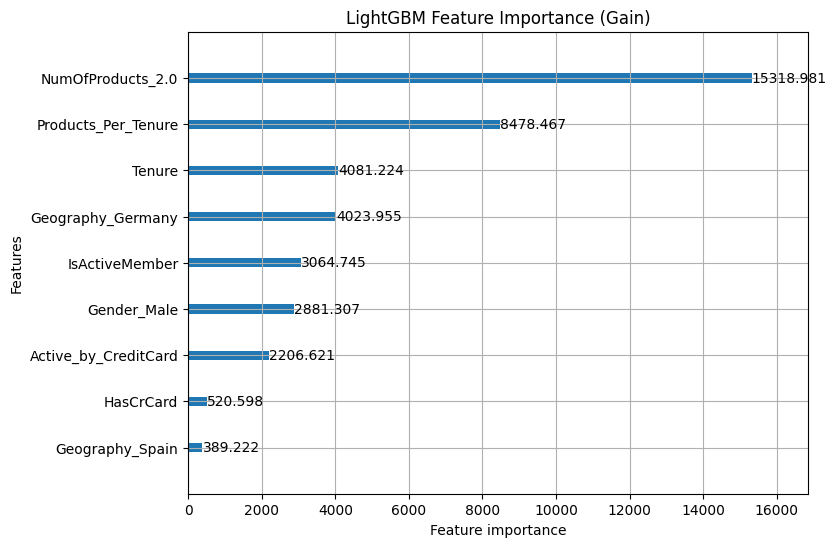

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[285]	valid_0's auc: 0.851107
AUC for fold 0: 0.8511069767441859
F1 Score for fold 0: 0.5330396475770925
---------Fold Completed--------
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[257]	valid_0's auc: 0.868788
AUC for fold 1: 0.8687881606765328
F1 Score for fold 1: 0.5531062124248497
---------Fold Completed--------
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[443]	valid_0's auc: 0.852766
AUC for fold 2: 0.8527661733615222
F1 Score for fold 2: 0.546236559139785
---------Fold Completed--------
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[470]	valid_0's auc: 0.880162
AUC for fold 3: 0.8801623678646935
F1 Score for fold 3: 0.5813008130081301
---------Fold Completed--------
Training until validation scores don't improve for 50 rounds
Early st

KeyboardInterrupt: 

In [ ]:
df.dtypes